## MLP (リサーチワークショップⅡ, 2024)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os

In [10]:
# 再現性を担保するため，乱数を固定
np.random.seed(1234)
torch.manual_seed(1234)

# 演算に用いるデバイスを指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Tensor へ変換するための transforms
'''
transform = transforms.Compose([transforms.ToTensor()])
'''
transform = transforms.Compose([transforms.ToTensor(),
                                lambda x: x.view(-1)])

# データの取得
root = os.path.join('data', 'mnist')
mnist_train = torchvision.datasets.MNIST(root=root, download=True, train=True,
                                         transform=transform)
mnist_test =  torchvision.datasets.MNIST(root=root, download=True, train=False,
                                         transform=transform)

# data loader の定義
batch_size = 32
train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [11]:
x, _ = next(iter(test_dataloader))
print(x.shape) # [32, 1, 28, 28]

torch.Size([32, 784])


In [12]:
# モデル MLP の定義
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [13]:
# モデルのインスタンス化
model = Net(input_size=28*28).to(device)

# 損失関数と最適化関数の定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
from torchsummary import summary
model = Net().to(device)
summary(model, (1, 28, 28))

ModuleNotFoundError: No module named 'torchsummary'

In [15]:
from tqdm import tqdm

epochs = 50 # 100

train_loss_history = []
test_loss_history = []
test_acc_history = []

for epoch in range(epochs):
    # 学習
    model.train()

    running_loss = 0
    ### for images, labels in tqdm(train_dataloader):
    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images) # 順伝播
        loss = criterion(outputs, labels) # 誤差
        running_loss += loss.item()
        loss.backward() # 誤差の逆伝播
        optimizer.step() # パラメータ更新


    train_loss = running_loss / len(train_dataloader)
    train_loss_history.append(train_loss) # 損失の記録

    # テスト
    model.eval()
    
    running_loss = 0
    total = 0 # データ数
    correct = 0 # 正解数を保存
    ### for images, labels in tqdm(test_dataloader):
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        ### optimizer.zero_grad()
        outputs = model(images) # 順伝播
        loss = criterion(outputs, labels) # 誤差
        running_loss += loss.item()
        ### loss.backward() # 誤差の逆伝播
        ### optimizer.step() # パラメータ更新

        predicted = torch.argmax(outputs, dim=1)
        correct += torch.sum(predicted == labels)
        total += labels.size(0)
        '''
        print(labels)
        print(predicted)
        '''

        '''
        import sys
        sys.exit()
        '''
        
    test_loss = running_loss / len(test_dataloader)
    test_acc = correct.item() / total
    test_loss_history.append(test_loss) # 損失の記録
    test_acc_history.append(test_acc)

    print('Epoch: {}, Train Loss: {:5f}, Test Loss: {:5f}, Test Accuracy: {:5f}'.format(epoch+1,
                                                                               train_loss,
                                                                               test_loss,
                                                                               test_acc))

    # latent space の状態を描画
    ### plot_latent_space(epoch+1)

Epoch: 1, Train Loss: 0.380533, Test Loss: 0.319612, Test Accuracy: 0.909100
Epoch: 2, Train Loss: 0.325973, Test Loss: 0.306284, Test Accuracy: 0.914600
Epoch: 3, Train Loss: 0.310965, Test Loss: 0.302258, Test Accuracy: 0.918900
Epoch: 4, Train Loss: 0.302765, Test Loss: 0.317949, Test Accuracy: 0.911800
Epoch: 5, Train Loss: 0.294672, Test Loss: 0.307006, Test Accuracy: 0.916700
Epoch: 6, Train Loss: 0.289681, Test Loss: 0.295033, Test Accuracy: 0.918700
Epoch: 7, Train Loss: 0.287134, Test Loss: 0.308548, Test Accuracy: 0.912500
Epoch: 8, Train Loss: 0.281759, Test Loss: 0.299449, Test Accuracy: 0.917200
Epoch: 9, Train Loss: 0.280346, Test Loss: 0.314750, Test Accuracy: 0.915300
Epoch: 10, Train Loss: 0.277306, Test Loss: 0.287071, Test Accuracy: 0.922100
Epoch: 11, Train Loss: 0.275124, Test Loss: 0.294053, Test Accuracy: 0.917700
Epoch: 12, Train Loss: 0.272970, Test Loss: 0.303841, Test Accuracy: 0.915400
Epoch: 13, Train Loss: 0.271750, Test Loss: 0.292843, Test Accuracy: 0.91

In [16]:
train_loss_history

[0.3805328202396631,
 0.3259725812067588,
 0.3109651238640149,
 0.302765026251475,
 0.29467247537175817,
 0.2896806092093388,
 0.2871336167057355,
 0.28175861219763754,
 0.28034647447168826,
 0.27730597172379495,
 0.27512436372190713,
 0.27297026563485466,
 0.27175016691982745,
 0.27031605001986025,
 0.26804387501329185,
 0.26703770003020766,
 0.26448136140704154,
 0.26499191343983014,
 0.2627499550183614,
 0.26167119946380457,
 0.26169671130677064,
 0.2621848646412293,
 0.2585788597181439,
 0.2581278489917517,
 0.2586769702732563,
 0.2581513061523438,
 0.2572167055875063,
 0.2543214495350917,
 0.2555232449680567,
 0.2544351922457417,
 0.25506766828894617,
 0.25308544759353,
 0.2537985635270675,
 0.2518894723882278,
 0.2528738338758548,
 0.2512491282403469,
 0.25142362494369347,
 0.25060375982522964,
 0.2496247430562973,
 0.2500408568561077,
 0.24983923795819282,
 0.24987560164729755,
 0.24874475131432217,
 0.24900512770911057,
 0.2492907259921233,
 0.24904967110355694,
 0.247464975125

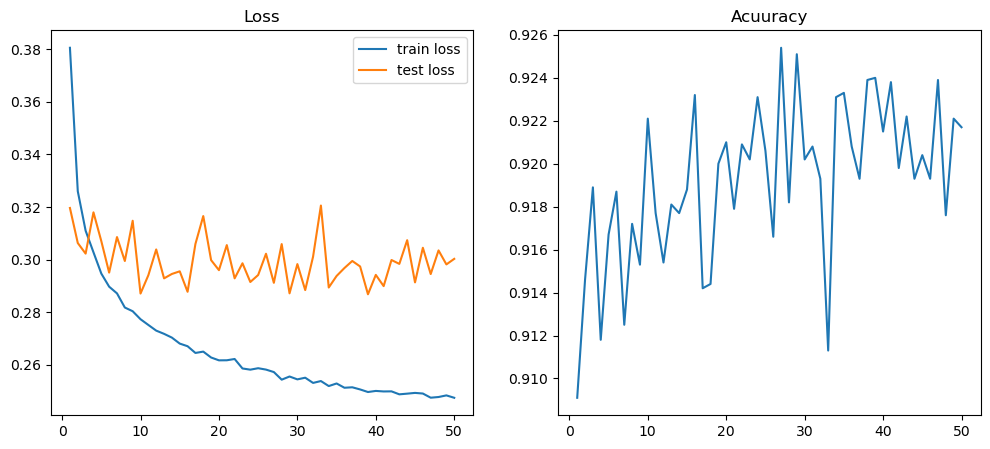

In [18]:
# 損失，正解率の可視化
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_loss_history)+1) # x軸

train_loss_history = np.array(train_loss_history) # y軸
test_loss_history = np.array(test_loss_history) # y軸
test_acc_history = np.array(test_acc_history) # y軸

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Loss')
ax1.plot(epochs, train_loss_history, label="train loss")
ax1.plot(epochs, test_loss_history, label="test loss")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
### ax2.set_ylim([0.9, 1.0])
ax2.set_title('Acuuracy')
ax2.plot(epochs, test_acc_history)

plt.show()

100%|████████████████████████████████████████| 313/313 [00:00<00:00, 327.39it/s]


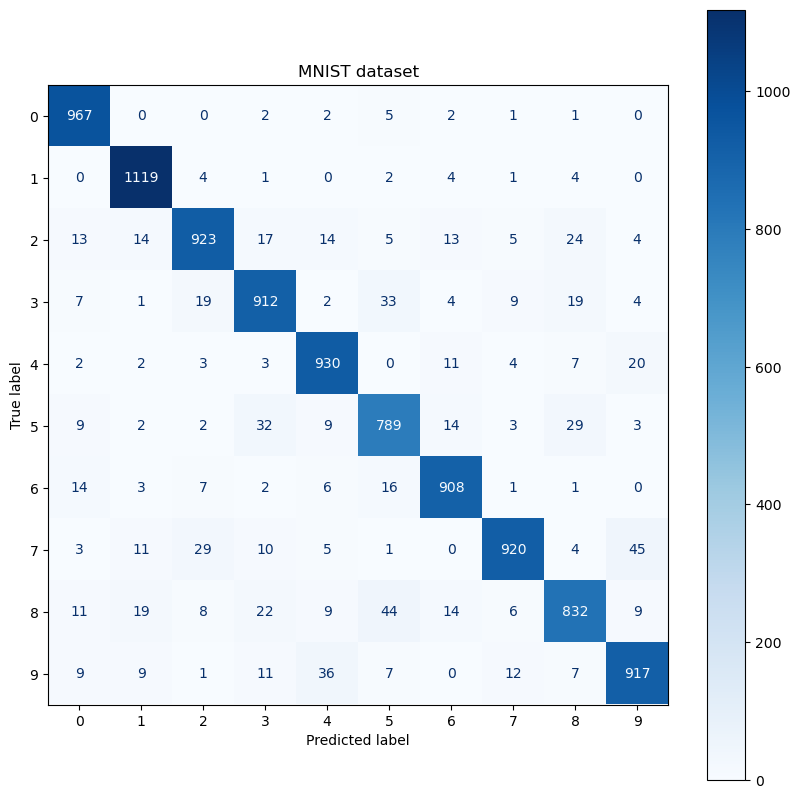

In [19]:
cm_predicted_list = [] # confusion matrix で利用するため予測値を蓄える
cm_true_list = [] # confusion matrix で利用するため真値を蓄える
    
for images, labels in tqdm(test_dataloader):
    images = images.to(device)
    labels = labels.to(device)

    ### optimizer.zero_grad()
    outputs = model(images) # 順伝播
    loss = criterion(outputs, labels) # 誤差
    running_loss += loss.item()
    ### loss.backward() # 誤差の逆伝播
    ### optimizer.step() # パラメータ更新

    predicted = torch.argmax(outputs, dim=1)

    # confusion matrix のため予測値／真値を蓄える
    cm_predicted_list += predicted.tolist()
    cm_true_list += labels.tolist()
        
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(cm_true_list, cm_predicted_list)
# cmp = ConfusionMatrixDisplay(cm, display_labels=['b_fully_ripened', 'b_half_ripened', 'b_green'])
cmp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('MNIST dataset')
# cmp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax) 
cmp.plot(cmap=plt.cm.Blues, ax=ax) 